In [1]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.chdir('..')
os.getcwd()

'/home/yermaand/audio-nn'

In [5]:

from src import *

In [16]:
def plot(d):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    X = []
    Y = []
    distribution = []

    d = {k: d[k] for k in sorted(d)}
    for label, preds in d.items():
        X.append(label)
        Y.append(np.mean(preds))
        distribution.append(len(preds))

    axes[0].set_xlabel('True class')
    axes[0].set_ylabel('Average Predicted class')
    axes[0].plot(X, Y, 'o-', label='pred')
    axes[0].plot(range(len(X)), 'o-', label='true')
    axes[0].grid()
    axes[0].legend()

    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Number of events')
    axes[1].grid()
    axes[1].plot(distribution, 'o-')
    plt.tight_layout()

In [7]:
root_uuid = '031_RX100_resized_128_sr_22050'

d = defaultdict(list)

for i in range(5):
    uuid = f'{root_uuid}/{i}'
    model, config = load_model_locally(uuid, device='cpu')
    datapool = DataPool(config.testing_files, config)

    for video in datapool:
        from_time, till_time = video.get_from_till_time(Part.WHOLE)

        preds, probs = validate_video(video, model, from_time=from_time, till_time=till_time)
        labels = get_labels(video, from_time, till_time)

        for prediction, label in zip(preds['n_counts'], labels['n_counts']):
            d[label].append(prediction)

Video loading:   0%|          | 0/8 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

Video loading:   0%|          | 0/7 [00:00<?, ?it/s]

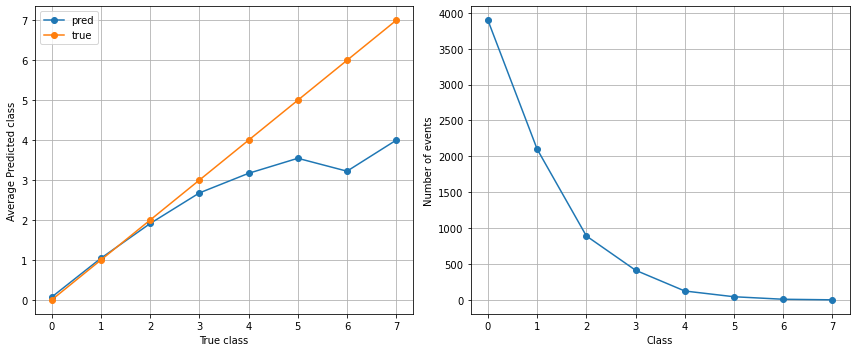

In [19]:
plot(d)

Video loading:   0%|          | 0/2 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

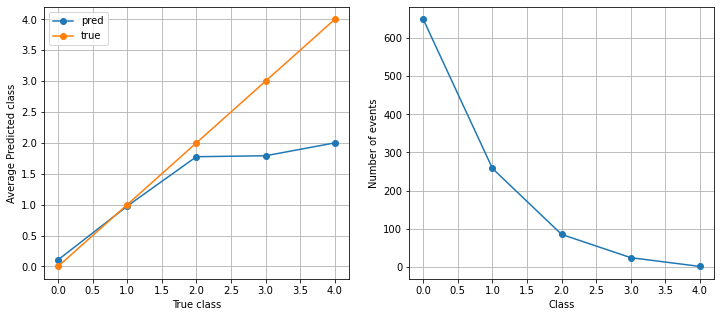

In [9]:
d_worst = defaultdict(list)

worst_selected = [
    '41_Dobrejovice_RX100',
    '37_Prazska_Jircany_RX100',
    '13_RX100',
    '35_Rovinska_RX100',
    '30_RadotinskaS_RX100'
]

for i in range(5):
    uuid = f'031_RX100_resized_128_sr_22050/{i}'
    model, config = load_model_locally(uuid, device='cpu')
    files = config.testing_files
    files = np.intersect1d(files, worst_selected)

    if len(files) == 0: continue

    datapool = DataPool(files, config)
    
    for video in datapool:
        from_time, till_time = video.get_from_till_time(Part.WHOLE)

        preds, probs = validate_video(video, model, from_time=from_time, till_time=till_time)
        labels = get_labels(video, from_time, till_time)

        for prediction, label in zip(preds['n_counts'], labels['n_counts']):
            d_worst[label].append(prediction)
    
plot(d_worst)

['19_Krocehlavska_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

['23_KeZlatnikum_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

['17_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

['16_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

['34_PrazskaDobrichovice_RX100']


Video loading:   0%|          | 0/1 [00:00<?, ?it/s]

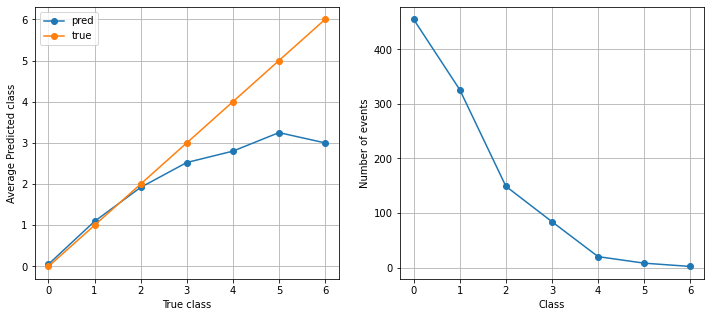

In [10]:
d_best = defaultdict(list)

best_selected = [
    '34_PrazskaDobrichovice_RX100',
    '19_Krocehlavska_RX100',
    '17_RX100',
    '16_RX100',
    '23_KeZlatnikum_RX100'
]

for i in range(5):
    uuid = f'010_eyedea_RX100_1/{i}'
    model, config = load_model_locally(uuid, device='cpu')
    files = config.testing_files
    files = np.intersect1d(files, best_selected)

    print(files)

    if len(files) == 0: continue

    datapool = DataPool(files, config)
    
    for video in datapool:
        from_time, till_time = video.get_from_till_time(Part.WHOLE)

        preds, probs = validate_video(video, model, from_time=from_time, till_time=till_time)
        labels = get_labels(video, from_time, till_time)

        for prediction, label in zip(preds['n_counts'], labels['n_counts']):
            d_best[label].append(prediction)
    
plot(d_best)

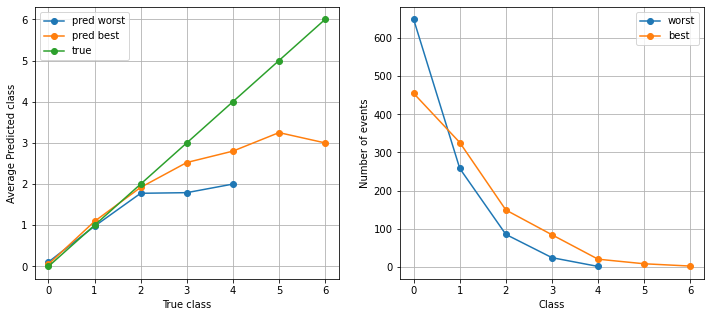

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))


def plot_d(d, ax1, ax2, plot_label):
    X = []
    Y = []
    distribution = []
    d = {k: d[k] for k in sorted(d)}
    for label, preds in d.items():
        X.append(label)
        Y.append(np.mean(preds))
        distribution.append(len(preds))
    ax1.plot(X, Y, 'o-', label=f'pred {plot_label}')
    ax2.plot(distribution, 'o-', label=plot_label)

    return X

X = plot_d(d_worst, axes[0], axes[1], 'worst')
X = plot_d(d_best, axes[0], axes[1], 'best')

axes[0].set_xlabel('True class')
axes[0].set_ylabel('Average Predicted class')
axes[0].plot(range(len(X)), 'o-', label='true')
axes[0].legend()
axes[0].grid()

axes[1].set_xlabel('Class')
axes[1].set_ylabel('Number of events')
axes[1].legend()
axes[1].grid()

In [15]:
np.array(d_worst[3]), np.array(d_best[3])

(array([1, 0, 1, 3, 1, 0, 1, 2, 1, 2, 2, 0, 2, 2, 2, 0, 3, 3, 3, 2, 2, 3,
        3, 4]),
 array([1, 3, 3, 3, 3, 4, 2, 3, 0, 1, 1, 4, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3,
        2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2, 3,
        2, 3, 4, 2, 3, 3, 2, 2, 3, 3, 2, 1, 2, 3, 3, 2, 2, 3, 3, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 2, 2, 2, 2, 3, 5, 3]))

In [26]:
np.sum([np.sum(d_best[k]) for k in d_best.keys()])

890

In [27]:
128 + 184 + 214 + 38 + 329


893